# EDA_FE 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/학교/YBIGTA/EDA FE/airbnb_listings.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [ ]:
# Q1
df.head(5)


,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [ ]:
# Q2
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        50796 non-null  int64  
 1   id                                50796 non-null  int64  
 2   host_response_time                31790 non-null  object 
 3   host_response_rate                31790 non-null  object 
 4   host_acceptance_rate              36781 non-null  object 
 5   host_is_superhost                 50791 non-null  object 
 6   host_listings_count               50791 non-null  float64
 7   host_total_listings_count         50791 non-null  float64
 8   host_verifications                50796 non-null  object 
 9   host_has_profile_pic              50791 non-null  object 
 10  host_identity_verified            50791 non-null  object 
 11  neighborhood                      50796 non-null  object 
 12  lati

In [ ]:
#Q2 
df_chart = pd.DataFrame({"missing_num":df.isnull().sum(), "missing_%": df.isnull().sum() / len(df) *100})
idx = df_chart[df_chart['missing_num'] == 0].index
df_chart2 = df_chart.drop(idx)
df_chart2_sort = df_chart2.sort_values(by='missing_num', ascending=False)
df_chart2_sort

,missing_num,missing_%
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

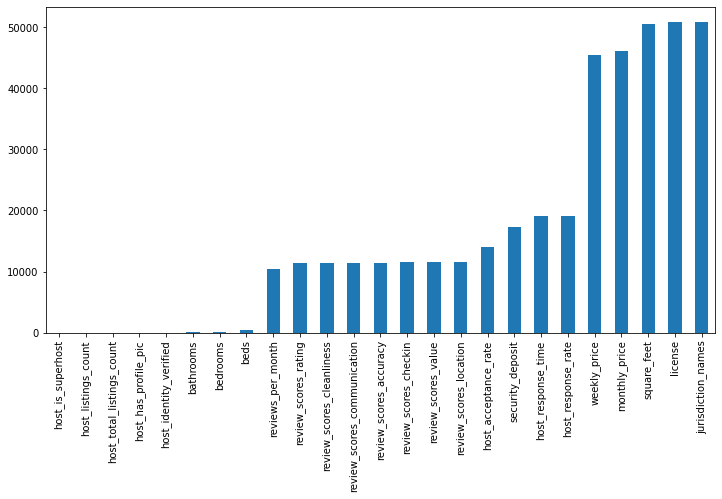

In [ ]:
# Q3
import missingno as msno
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace= True)
missing.plot.bar(figsize = (12,6))

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [ ]:
# Q4
pd.set_option('display.max_columns', None)
df2 = df[df['beds'].isnull()]
display(df2.head(5))


,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [ ]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [ ]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        50796 non-null  int64  
 1   id                                50796 non-null  int64  
 2   host_is_superhost                 50791 non-null  object 
 3   host_listings_count               50791 non-null  float64
 4   host_total_listings_count         50791 non-null  float64
 5   host_verifications                50796 non-null  object 
 6   host_has_profile_pic              50791 non-null  object 
 7   host_identity_verified            50791 non-null  object 
 8   neighborhood                      50796 non-null  object 
 9   latitude                          50796 non-null  float64
 10  longitude                         50796 non-null  float64
 11  is_location_exact                 50796 non-null  object 
 12  prop

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

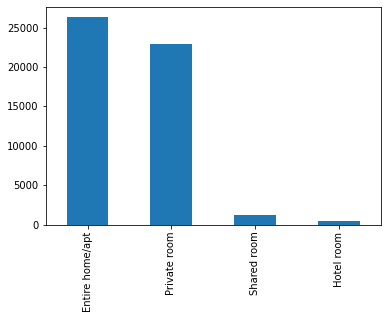

In [ ]:
# Q5
df["room_type"].value_counts().plot(kind = "bar")

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

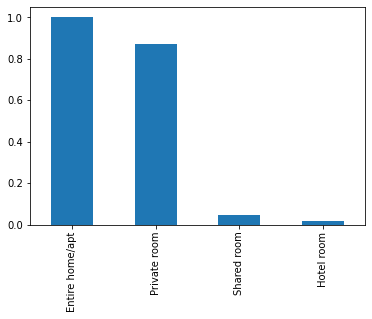

In [ ]:
# Q6
df_rate = df["room_type"].value_counts()/26274
df_rate.plot(kind = "bar")

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

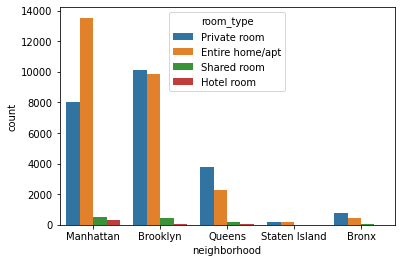

In [ ]:
# Q7
sns.countplot(x = df['neighborhood'], hue = df['room_type'], data = df)

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

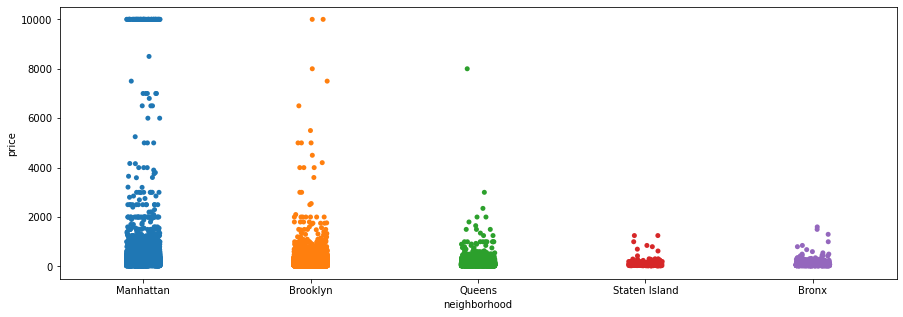

In [ ]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize = (15,5))
sns.stripplot(x = df['neighborhood'], y = df['price'], data =df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
# roomtype 중에는 private_room이 가장 많았으며, manhattan에 많았다.
# 각 지역별로 가격은 manhattan과 brooklyn이 눈에 띄었으며, 특히 manhattan에 가장 비싼 집들이 모여있다는 것을 알 수 있다.


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

(array([3.651e+04, 9.804e+03, 2.987e+03, 8.590e+02, 3.000e+02, 1.280e+02,
        4.900e+01, 1.560e+02, 1.000e+00, 2.000e+00]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <a list of 10 Patch objects>)

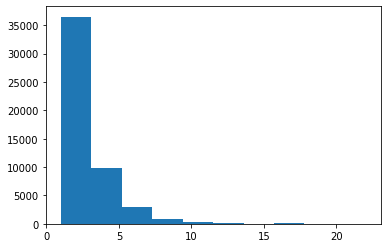

In [ ]:
# Q10
plt.hist(df['accommodates'])

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

(0.0, 1000.0)

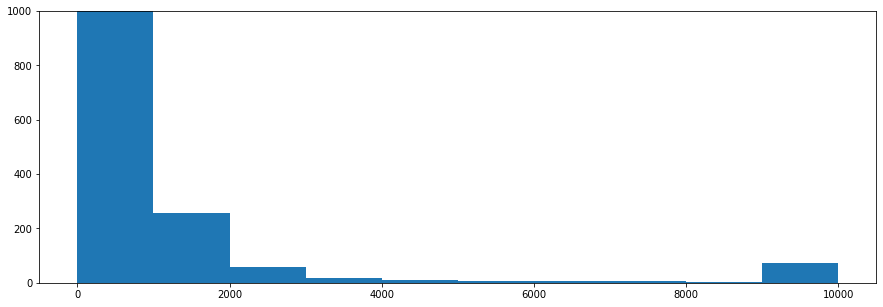

In [ ]:
# Q11
plt.figure(figsize = (15,5))
plt.hist(df['price'])
plt.ylim(0, 1000)

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [76]:
df = pd.read_csv('/content/drive/MyDrive/학교/YBIGTA/EDA FE/airbnb_listings.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [74]:
#Q12
missing_num = df.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_num / df.shape[0]
missing_percentage

df.drop('jurisdiction_names', axis = 1)
df.drop('license', axis = 1)
df.drop('square_feet', axis = 1)
df.drop('monthly_price', axis = 1)
df.drop('weekly_price', axis = 1)
df.drop('host_response_time', axis = 1)
df.drop('host_response_rate', axis = 1)
df.drop('security_deposit', axis = 1)
df.drop('host_acceptance_rate', axis = 1)

df['review_scores_value'].dropna()
df['review_scores_location'].dropna()
df['review_scores_checkin'].dropna()
df['review_scores_accuracy'].dropna()
df['review_scores_communication'].dropna()
df['review_scores_cleanliness'].dropna()
df['review_scores_rating'].dropna()
df['reviews_per_month'].dropna()

df['beds'].fillna(df['beds'].median())
df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'].fillna(df['bathrooms'].median())
df['host_is_superhost'].fillna(df['host_is_superhost'].mode())
df['host_identity_verified'].fillna(df['host_identity_verified'].mode())
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode())
df['host_total_listings_count'].fillna(df['host_total_listings_count'].median())
df['host_listings_count'].fillna(df['host_listings_count'].median())


0         0.0
1         6.0
2         1.0
3         1.0
4         3.0
         ... 
50791     5.0
50792    21.0
50793     1.0
50794     2.0
50795     1.0
Name: host_listings_count, Length: 50796, dtype: float64

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [75]:
#Q13-1)
print("결측치 제거 후 데이터 개수 : ", df.shape[0])
# 결측치가 제거 후 데이터가 총 몇개인지 알기 위해 진행하였다.

결측치 제거 후 데이터 개수 :  50796


In [77]:
#Q13-2)
df.isnull().sum()
# 결측치 제거 후 남은 결측치가 어디에 있는지 확인해봤다.

Unnamed: 0                              0
id                                      0
host_response_time                  19006
host_response_rate                  19006
host_acceptance_rate                14015
host_is_superhost                       5
host_listings_count                     5
host_total_listings_count               5
host_verifications                      0
host_has_profile_pic                    5
host_identity_verified                  5
neighborhood                            0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              54
bedrooms                               77
beds                                  482
bed_type                                0
amenities                               0
square_feet                       

In [78]:
#Q13-3)
df2 = df.dropna()
# 모든 결측치를 제거해보았다.

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. 
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
